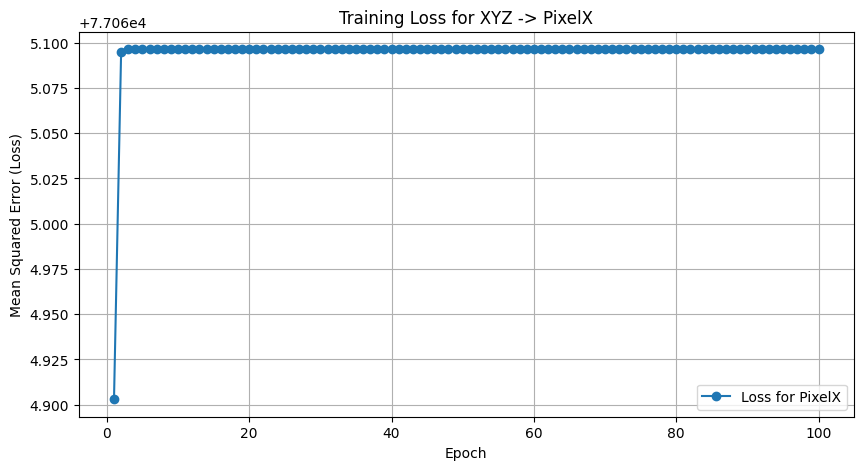

Test MSE for XYZ -> PixelX: 103669.99106446959


['xyz_to_pixelX_model.pkl']

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load dataset
df = pd.read_csv('output.csv')

# Prepare data for (X, Y, Z) -> PixelX
X_xyz = df[['X', 'Y', 'Z']].values
y_pixelX = df['PixelX'].values  # Target for PixelX

# Split datasets
X_train_xyz, X_test_xyz, y_train_pixelX, y_test_pixelX = train_test_split(X_xyz, y_pixelX, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_xyz)
X_test_scaled = scaler.transform(X_test_xyz)

# Initialize model with adjusted hyperparameters
model_xyz_to_pixelX = SGDRegressor(max_iter=1000, learning_rate='adaptive', eta0=0.01, random_state=42, warm_start=True)

# Train model and track loss
losses_pixelX = []
for epoch in range(100):
    model_xyz_to_pixelX.fit(X_train_scaled, y_train_pixelX)
    y_pred_pixelX = model_xyz_to_pixelX.predict(X_train_scaled)
    mse_pixelX = mean_squared_error(y_train_pixelX, y_pred_pixelX)
    losses_pixelX.append(mse_pixelX)

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), losses_pixelX, label='Loss for PixelX', marker='o')
plt.title('Training Loss for XYZ -> PixelX')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid()
plt.show()

# Evaluate model on the test set
mse_test_pixelX = mean_squared_error(y_test_pixelX, model_xyz_to_pixelX.predict(X_test_scaled))
print(f"Test MSE for XYZ -> PixelX: {mse_test_pixelX}")

# Save the model
joblib.dump(model_xyz_to_pixelX, 'xyz_to_pixelX_model.pkl')


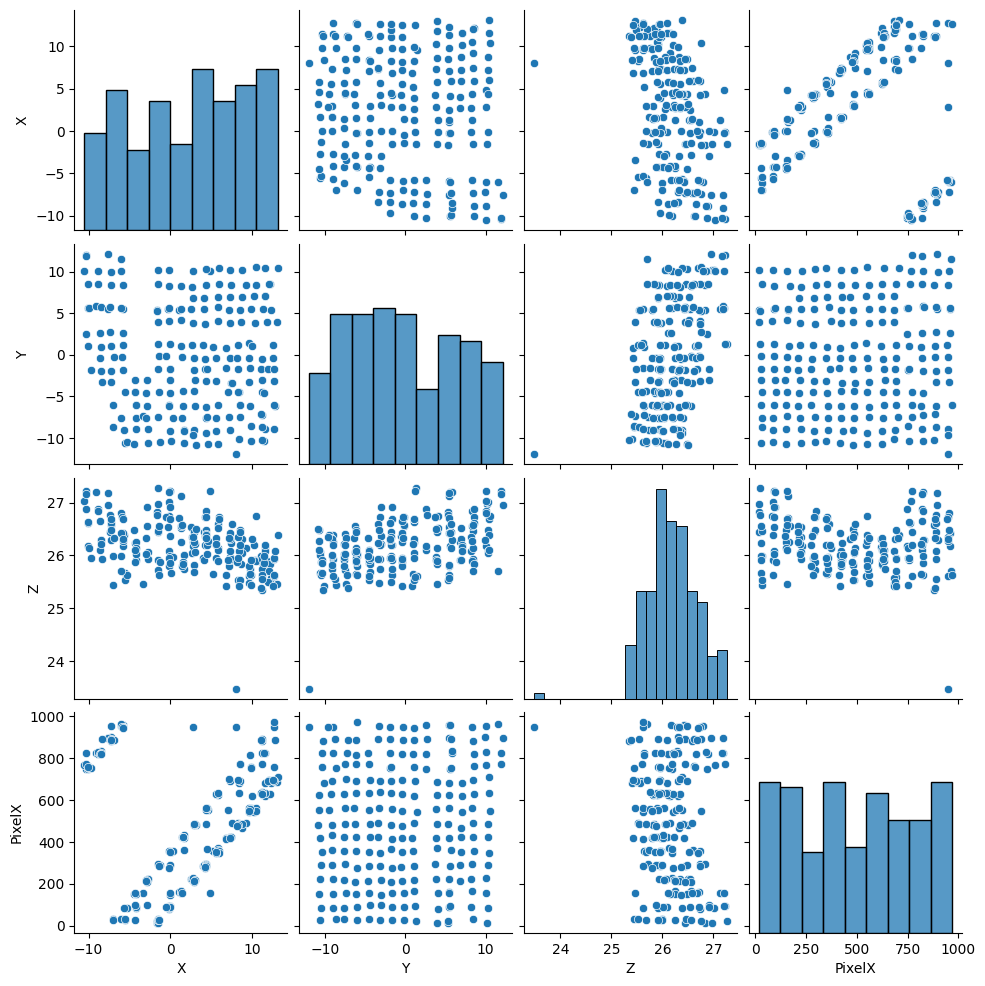

In [7]:
import seaborn as sns

sns.pairplot(df[['X', 'Y', 'Z', 'PixelX']])
plt.show()


In [8]:
print(df[['X', 'Y', 'Z']].describe())


                X           Y           Z
count  210.000000  210.000000  210.000000
mean     2.271005   -0.268071   26.182076
std      6.852887    6.641436    0.484148
min    -10.558000  -11.966000   23.477000
25%     -3.300500   -6.077250   25.882500
50%      2.834000   -0.408000   26.177000
75%      8.301750    5.483750   26.486250
max     13.107000   12.106000   27.272000


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict PixelX, PixelY on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model (optional)
print(f"Predicted values:\n{y_pred}")


Predicted values:
[[ 332.42199287  683.17021085]
 [ 732.533427    973.4744689 ]
 [ 512.53439877  482.57614562]
 [ 613.63523109  849.8171477 ]
 [ 333.83276524  834.05875655]
 [ 706.86985779  775.72519913]
 [ 367.27933142  773.30011825]
 [ 564.47384701  633.42514284]
 [ 309.64420857  246.90407948]
 [ 514.40818635  577.8076076 ]
 [ 575.26132472  239.39048247]
 [ 724.08018765 1063.90469855]
 [ 423.78761086  411.61632782]
 [ 510.58664766  526.4780335 ]
 [ 337.18350184  611.71802319]
 [ 344.6893737   785.73498324]
 [ 496.60212703  459.05067438]
 [ 464.16499961  843.22862202]
 [ 593.33664652  625.28300268]
 [ 357.44985976  100.43949361]
 [ 378.12850684  943.40493381]
 [ 323.4339719   420.91777746]
 [ 613.90976718  119.76421879]
 [ 465.38083544  287.00963526]
 [ 402.33156922  171.30609184]
 [ 660.9251801   786.34051293]
 [ 315.97096877  357.30578987]
 [ 586.90638707  442.5845274 ]
 [ 377.91760074  685.07326203]
 [ 811.55529453 1088.23374656]
 [ 412.23733083  368.01078566]
 [ 338.85756881  415.

/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


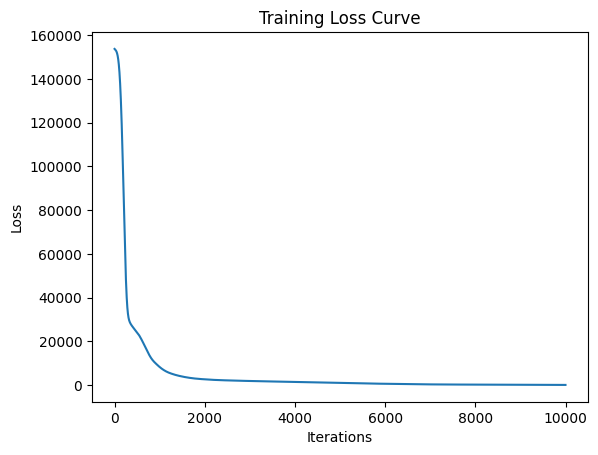

Predicted values:
[[113.94011776 774.14718428]
 [807.78826882 888.17348186]
 [433.02402117 546.02340571]
 [926.58321076 837.63883391]
 [231.19943797 886.98426386]
 [751.2301679  746.16676733]
 [263.9949008  817.37183458]
 [905.00170587 570.76508664]
 [177.9384828  222.26104323]
 [791.45380321 618.76921566]
 [629.58240649 303.54561486]
 [890.75384257 955.19365469]
 [522.3032985  369.19646154]
 [564.08147704 564.8269408 ]
 [ 66.21957331 725.03836774]
 [361.8945255  815.10097019]
 [512.37557249 353.86646663]
 [237.3855833  869.48559941]
 [812.31974756 602.94876729]
 [433.59227142 226.55703357]
 [350.7100117  956.08712038]
 [215.07588348 478.34699776]
 [651.28223063  72.95861966]
 [487.29938844 350.10333587]
 [425.60849994 294.22310311]
 [666.34918357 756.05501949]
 [419.21837275 331.06850169]
 [545.37544997 494.18180736]
 [ 41.82989512 768.88056618]
 [750.17992294 934.81410433]
 [280.90118094 316.26245644]
 [264.58962991 476.34719545]
 [502.7450448  814.78119783]
 [310.84734619 377.140832

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42, warm_start=True)
model.fit(X_train_scaled, y_train)

# Get the training loss values
loss_values = model.loss_curve_

# Plot the loss graph
plt.plot(loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Predict PixelX, PixelY on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model (optional)
print(f"Predicted values:\n{y_pred}")


/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/arjun/Desktop/AI_ENV/l

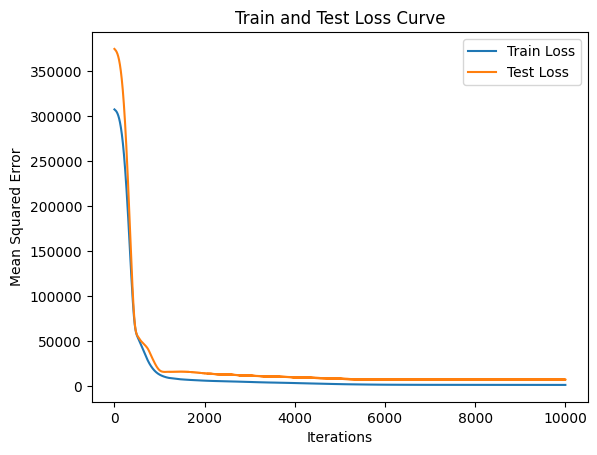

Predicted values:
[[  92.92324668  755.30148361]
 [ 829.8383068   906.67571054]
 [ 471.84934057  538.43719102]
 [ 880.0577302   846.0687237 ]
 [ 211.10280865  903.19130103]
 [ 736.6027105   715.40379284]
 [ 224.28420891  809.52747277]
 [ 894.05023103  556.0017409 ]
 [ 101.10523492  224.34043609]
 [ 721.58751199  592.36196657]
 [ 604.73025816  301.29701192]
 [ 857.43307152 1008.78828364]
 [ 574.05900747  392.02839835]
 [ 517.53085022  561.49342548]
 [  23.2681854   692.48450548]
 [ 369.19555887  815.0862928 ]
 [ 621.62867248  410.01202668]
 [  36.45419375  886.33647486]
 [ 794.728581    584.94557143]
 [ 434.38368434  211.83875684]
 [ 347.17398374  985.97050594]
 [ 216.28312612  499.73396018]
 [ 698.60615689   83.5665356 ]
 [ 556.1913549   364.84406569]
 [ 487.81494835  290.59518986]
 [ 660.71427599  758.40700378]
 [ 333.00933247  354.87242216]
 [ 537.46935172  483.75124741]
 [   7.45441017  753.05762885]
 [ 765.99586958  988.6092913 ]
 [ 514.75932022  348.25207066]
 [ 266.1982536   498.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv('output.csv')

# Extract features (X, Y, Z) and target (PixelX, PixelY)
X = data[['X', 'Y', 'Z']]
y = data[['PixelX', 'PixelY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1, warm_start=True, random_state=42)

# Lists to store loss values
train_losses = []
test_losses = []

# Train the model and calculate train and test losses at each iteration
for _ in range(2500):  # Train for 1000 iterations
    model.fit(X_train_scaled, y_train)  # Train the model for one iteration
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate train and test losses (MSE)
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    
    # Append the losses to the lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Train and Test Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate the final model (optional)
y_pred = model.predict(X_test_scaled)
print(f"Predicted values:\n{y_pred}")


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
# If you've saved the model previously, load it using joblib or pickle
# from joblib import load
# model = load('trained_model.joblib')

# Example input for prediction (X, Y, Z values)
input_data = {'X': [-1.518], 'Y': [1.301], 'Z': [27.272]}  # Replace with your input data

# Load and preprocess the data
data = pd.DataFrame(input_data)
scaler = StandardScaler()

# Fit the scaler on the original training data (you can save and reuse the scaler if needed)
# Fit on the training data used to train the model
# X_train_scaled is the scaled version of your original training data (make sure to use the same scaler)
scaler.fit(X_train)   # Uncomment if you need to fit on the original training data

# Scale the input data using the scaler
input_scaled = scaler.transform(data)

# Perform prediction with the trained model
predicted_pixel = model.predict(input_scaled)

# Output the predicted PixelX and PixelY values
print(f"Predicted PixelX: {predicted_pixel[0][0]}, Predicted PixelY: {predicted_pixel[0][1]}")


Predicted PixelX: 12.65371366040633, Predicted PixelY: 570.1507008089804
